In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data=data.drop(['id','ever_married','Residence_type'],axis=1)

In [7]:
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1


In [8]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data=data.fillna(data.mean())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

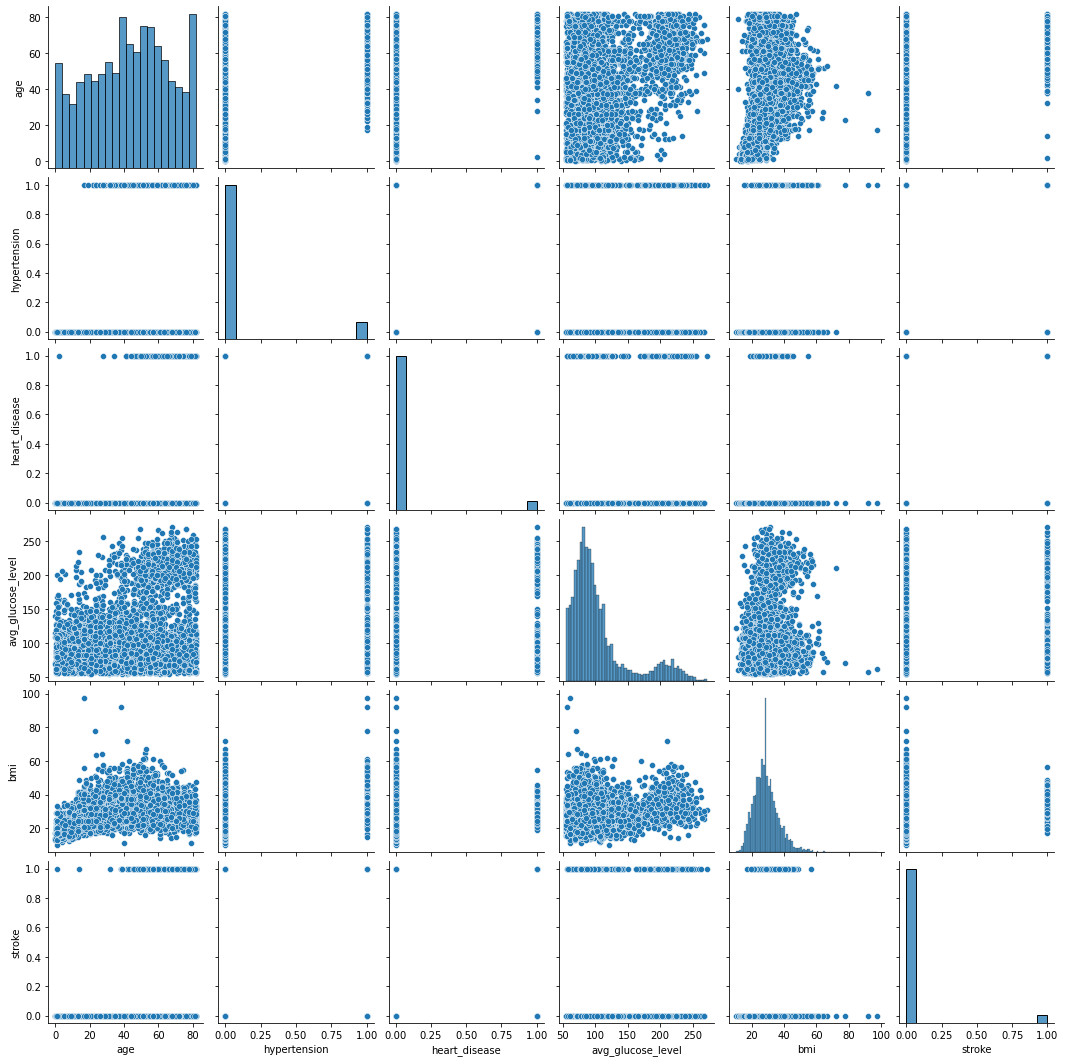

In [10]:
import seaborn as sns
sns.pairplot(data)

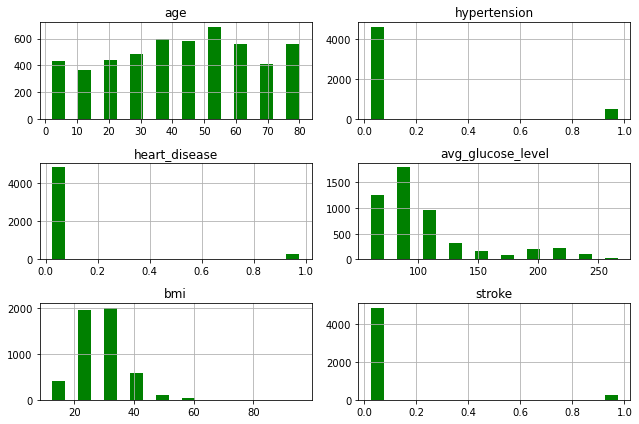

In [11]:
data.hist(rwidth=0.5,color='g',figsize=(9,6))
plt.tight_layout()

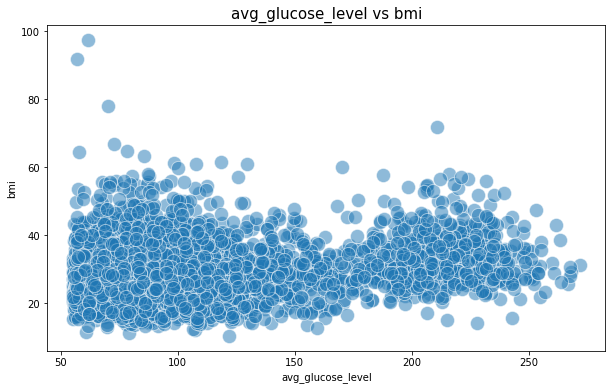

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(x='avg_glucose_level',y='bmi',data=data,s=200,alpha=0.5,edgecolor='white')
plt.title('avg_glucose_level vs bmi',fontsize=15)
plt.xlabel('avg_glucose_level')
plt.ylabel('bmi')
plt.show()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


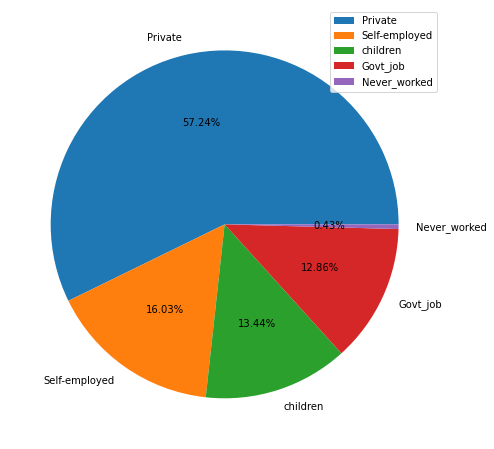

In [21]:
print(data['work_type'].value_counts())

plt.figure(figsize=(8,8))
mylabels=(data['work_type'].value_counts().index)
plt.pie(data['work_type'].value_counts(),labels=mylabels,autopct='%1.2f%%')
plt.legend(loc='best')
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


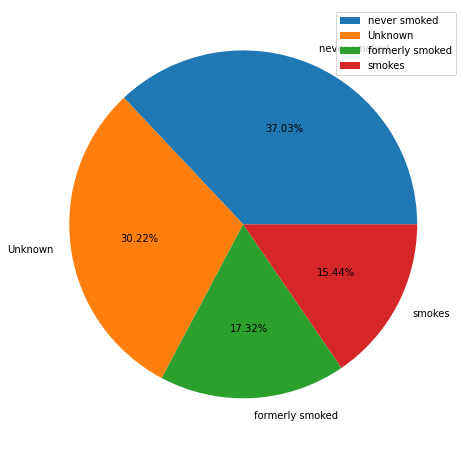

In [24]:
print(data['smoking_status'].value_counts())

plt.figure(figsize=(8,8))
mylabels=(data['smoking_status'].value_counts().index)
plt.pie(data['smoking_status'].value_counts(),labels=mylabels,autopct='%1.2f%%')
plt.legend(loc='upper right')
plt.show()

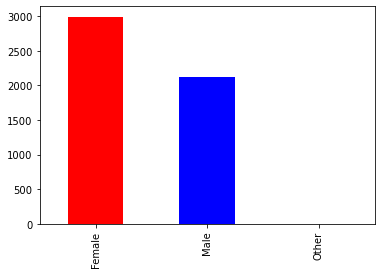

In [32]:
data['gender'].value_counts().plot.bar(color=['r','b','orange'])
plt.show()



In [13]:
corr=data.corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


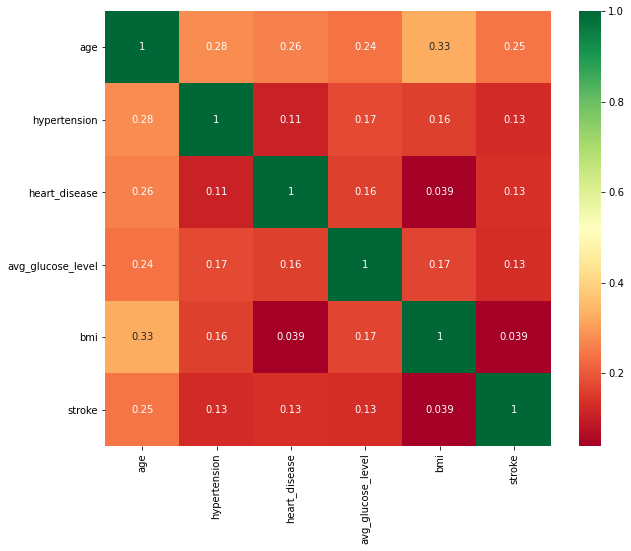

In [34]:

index=corr.index
plt.figure(figsize=(10,8))
g=sns.heatmap(data[index].corr(),annot=True,cmap="RdYlGn")

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(data['gender'])

In [36]:
data['gender']=label
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,Private,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,Self-employed,202.21,28.893237,never smoked,1
2,1,80.0,0,1,Private,105.92,32.500000,never smoked,1
3,0,49.0,0,0,Private,171.23,34.400000,smokes,1
4,0,79.0,1,0,Self-employed,174.12,24.000000,never smoked,1


In [37]:
label2=le.fit_transform(data['work_type'])

In [38]:
data['work_type']=label2
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,3,202.21,28.893237,never smoked,1
2,1,80.0,0,1,2,105.92,32.500000,never smoked,1
3,0,49.0,0,0,2,171.23,34.400000,smokes,1
4,0,79.0,1,0,3,174.12,24.000000,never smoked,1


In [39]:
label3=le.fit_transform(data['smoking_status'])
data['smoking_status']=label3
data.head()

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,2,228.69,36.600000,1,1
1,0,61.0,0,0,3,202.21,28.893237,2,1
2,1,80.0,0,1,2,105.92,32.500000,2,1
3,0,49.0,0,0,2,171.23,34.400000,3,1
4,0,79.0,1,0,3,174.12,24.000000,2,1


In [40]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [41]:
x=data.drop('stroke',axis=1)
y=data['stroke']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=67)

In [43]:
x_train.shape

(4088, 8)

In [44]:
x_test.shape

(1022, 8)

In [45]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
x_train_res,y_train_res=sm.fit_resample(x_train,y_train.values.ravel())

In [46]:
y_train.values.ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
x_train_res.shape

(7778, 8)

In [48]:
y_train_res.shape

(7778,)

In [67]:
y_test.shape

(1022,)

In [49]:
print('After Oversampling,counts of label 1:',sum(y_train_res==1))
print('After Oversampling,counts of label 0:',sum(y_train_res==0))

After Oversampling,counts of label 1: 3889
After Oversampling,counts of label 0: 3889


## Random Forest classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train_res,y_train_res)

RandomForestClassifier()

In [51]:
y_pred=rf.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification_report',classification_report(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))

Classification_report               precision    recall  f1-score   support

           0       0.96      0.92      0.94       972
           1       0.16      0.28      0.20        50

    accuracy                           0.89      1022
   macro avg       0.56      0.60      0.57      1022
weighted avg       0.92      0.89      0.91      1022

confusion_matrix [[897  75]
 [ 36  14]]


In [53]:
print('AccuracyScore',accuracy_score(y_test,y_pred))

AccuracyScore 0.8913894324853229


## Naive_bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train_res,y_train_res)

GaussianNB()

In [55]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [56]:
print('Classification_report',classification_report(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))

Classification_report               precision    recall  f1-score   support

           0       0.99      0.72      0.83       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.80      1022

confusion_matrix [[701 271]
 [ 10  40]]


In [57]:
print('AccuracyScore',accuracy_score(y_test,y_pred))

AccuracyScore 0.7250489236790607


# Logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train_res,y_train_res)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
y_pred=lg.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification report',classification_report(y_test,y_pred))
print("Confusion_matrix",confusion_matrix(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))


Classification report               precision    recall  f1-score   support

           0       0.98      0.75      0.85       972
           1       0.13      0.74      0.22        50

    accuracy                           0.75      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.94      0.75      0.82      1022

Confusion_matrix [[726 246]
 [ 13  37]]
Accuracy Score 0.7465753424657534


## Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train_res,y_train_res)

DecisionTreeClassifier()

In [74]:
y_pred=dc.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Classification report',classification_report(y_test,y_pred))
print("Confusion_matrix",confusion_matrix(y_test,y_pred))
print('Accuracy Score',accuracy_score(y_test,y_pred))

Classification report               precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.32      0.19        50

    accuracy                           0.87      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.92      0.87      0.89      1022

Confusion_matrix [[871 101]
 [ 34  16]]
Accuracy Score 0.8679060665362035


# support vector machine

In [81]:
from sklearn.svm import SVC
svc=SVC(C=20)
svc.fit(x_train_res,y_train_res)

SVC(C=20)

In [82]:
svc.score(x_test,y_test)


0.713307240704501

## K nearest neighbors

In [86]:
from sklearn.neighb

#knn=KNeighborsClassifier(n_neighbors=1)
#knn.fit(x_train_res,y_train_res)
